# Class 7

## Error handling
Exceptions

In [8]:
for a in range(5):
    print(1/a)

ZeroDivisionError: division by zero

### Handle errors so that execution will not stop

In [7]:
for a in range(5):
    try:
        print(1/a)
    except ZeroDivisionError:
        print("Cannot divide with 0")

Cannot divide with 0
1.0
0.5
0.3333333333333333
0.25


### Catch all exceptions
Beware Ctrl-C will not work!

In [4]:
for a in range(5):
    try:
        print(1/a)
    except:
        print("Cannot divide with 0")

Cannot divide with 0
1.0
0.5
0.3333333333333333
0.25


Can be useful if you do not want a lot of if statements. It calculations go wrong it ends up in the except part

In [9]:
l = [0, 1, 3, 4]
for a in range(5):
    try:
        i = l.index(a)
        print(i)
        # very complicated stuff with i
    except ValueError:
        pass

0
1
2
3


The calculation may go wrong at many points and you do not want to continue

In [18]:
l = [0, 1, 3, 4]
for a in range(5):
    try:
        if a == 3:
            raise Exception("Stop doing this!")
        # very complicated stuff with i
        print(a)
    except:
        pass

0
1
2
4


In [19]:
l = [0, 1, 3, 4]
for a in range(5):
    if a == 3:
        continue
    # very complicated stuff with i
    print(a)


0
1
2
4


## Data formats: json

<img src="json_example.png">

This format is known as [JSON (Javascript Object Notation)](http://en.wikipedia.org/wiki/JSON). It should look familiar to you because it's almost exactly how we type a dictionary into python.

This data format has become **very popular recently** because it's not only how you write a python dict but also a **Javascript object**. This means a web browser can trivially parse a JSON string. Other formats, like XML, require real parser code.

#### JSON in Python

Let's see how to use JSON data in python then we'll return to the exchange data.

In [20]:
import json

D = {"name" : "Alice"}
json_str = json.dumps(D) # dumps -> dump string
print(json_str)
print(type(json_str))


{"name": "Alice"}
<class 'str'>


JSON can actually represent more than dicts, like a list of dicts:

In [22]:
# note the single- vs. double-quotes...
string = '[ {"name":"Bob","age":28}, {"name":"Alice","age":23} ]'
print(type(string))
D = json.loads(string)
print(D)
print(type(D))
print(D[0]["name"], D[0]["age"])
print(type(D[0]))

<class 'str'>
[{'name': 'Bob', 'age': 28}, {'name': 'Alice', 'age': 23}]
<class 'list'>
Bob 28
<class 'dict'>


### Quick exercise 1
An example: <pre>

{'id1':   
   {'name': ['Sara'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id2':   
  {'name': ['David'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id3':   
    {'name': ['Peter'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
 'id4':   
   {'name': ['Surya'],   
    'class': ['V'],   
    'subject_integration': ['english, math, science']  
   },  
}


</pre>
Put all this text in a file, read it at one (not line by line) as a string, and then convert it to a dictionary by using the module json. Put it in the variable d.
***

In [46]:
# note the single- vs. double-quotes...
myfile = open('jason.txt', mode = 'r')
data = myfile.read()
print(type(data))
d = json.loads(data)
print(d)

<class 'str'>
{'id1': {'name': ['Sara'], 'class': ['V'], 'subject_integration': ['english, math, science']}, 'id2': {'name': ['David'], 'class': ['V'], 'subject_integration': ['english, math, science']}, 'id3': {'name': ['Peter'], 'class': ['V'], 'subject_integration': ['english, math, science']}, 'id4': {'name': ['Surya'], 'class': ['V'], 'subject_integration': ['english, math, science']}}


In [1]:
type(d)

NameError: name 'd' is not defined

In [48]:
list(d.values())[0]

{'name': ['Sara'],
 'class': ['V'],
 'subject_integration': ['english, math, science']}

In [49]:
list(list(d.values())[0].keys())

['name', 'class', 'subject_integration']

So you can take your dictionary and dump it with the module ``json``

In [50]:
dump_jason=json.dumps(d)

This way you will get a string

In [51]:
print(dump_jason)

{"id1": {"name": ["Sara"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id2": {"name": ["David"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id3": {"name": ["Peter"], "class": ["V"], "subject_integration": ["english, math, science"]}, "id4": {"name": ["Surya"], "class": ["V"], "subject_integration": ["english, math, science"]}}


You can put this string in a file, to share data with someone else, or to store it, then load it again through the ``json`` module

In [52]:
load_jason=json.loads(dump_jason)

In [53]:
list(load_jason.values())

[{'name': ['Sara'],
  'class': ['V'],
  'subject_integration': ['english, math, science']},
 {'name': ['David'],
  'class': ['V'],
  'subject_integration': ['english, math, science']},
 {'name': ['Peter'],
  'class': ['V'],
  'subject_integration': ['english, math, science']},
 {'name': ['Surya'],
  'class': ['V'],
  'subject_integration': ['english, math, science']}]

# Accessing Web APIs

As a data-collection example, suppose we want to find out how currencies compare to one another over time. In other words, let's plot a time series of [exchange rates](http://en.wikipedia.org/wiki/Exchange_rate).

There's a nice, free website called https://openexchangerates.org. They provide a nice API to get exchange rate data. Let's use this.

**BTW**, API means "Application Programming Interface" and is a set of functions and procedures that allow the creation of applications which access the features or data of an operating system, application, or other service.

* You need to [register with them](https://openexchangerates.org/signup/free) to get an **APP ID**. This lets them track how often you call their website and block you if you do too much (this is known as rate limiting).

<img src="rate_limit.png" height="700" width="700">


The APP ID is a string of 32 characters. I've got mine saved by itself in a text file which the python will load:

In [56]:
app_id = "4257d4b73f1246afa4f297d9ef74ede1"

Now let's download something and see what we get. Their [docs](https://openexchangerates.org/documentation) help us see how to build a URL.

In [57]:
# from their docs:
# http://openexchangerates.org/api/latest.json?app_id=YOUR_APP_ID

# build a url from pieces:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id
URL = "%s/historical/2011-10-18.json?%s" % (base_url, id_str) # this format is specified at the end of the doc page

In [58]:
URL

'http://openexchangerates.org/api/historical/2011-10-18.json?app_id=4257d4b73f1246afa4f297d9ef74ede1'

OK, let's download the text of that "page" and see what we get.

In [59]:
import urllib.request
result = urllib.request.urlopen(URL)
text = result.read()

In [60]:
print(type(text))
# now print the beginning and ending of the text:
print(text[:1500])
print('\n')
print(text[-300:])

<class 'bytes'>
b'{\n  "disclaimer": "Usage subject to terms: https://openexchangerates.org/terms",\n  "license": "https://openexchangerates.org/license",\n  "timestamp": 1318953600,\n  "base": "USD",\n  "rates": {\n    "AED": 3.67285,\n    "AFN": 48.325965,\n    "ALL": 102.607855,\n    "AMD": 376.327731,\n    "ANG": 1.77665,\n    "AOA": 94.851761,\n    "ARS": 4.215038,\n    "AUD": 0.979142,\n    "AWG": 1.79025,\n    "AZN": 0.786155,\n    "BAM": 1.429934,\n    "BBD": 2,\n    "BDT": 75.987773,\n    "BGN": 1.430108,\n    "BHD": 0.37653,\n    "BIF": 1231.30548,\n    "BMD": 1,\n    "BND": 1.272581,\n    "BOB": 7.013496,\n    "BRL": 1.767354,\n    "BSD": 1,\n    "BTN": 49.334603,\n    "BWP": 7.340381,\n    "BYR": 4395.431805,\n    "BZD": 1.99315,\n    "CAD": 1.018634,\n    "CDF": 915.22783,\n    "CHF": 0.900405,\n    "CLF": 0.021176,\n    "CLP": 510.174179,\n    "CNY": 6.3813,\n    "COP": 1894.791035,\n    "CRC": 510.707928,\n    "CVE": 80.624452,\n    "CZK": 18.206884,\n    "DJF": 177.721,

**Great!** This means we can take the text from that website and run it through json.loads and we have a nice accessible python dict:

In [61]:
data = json.loads(str(text,"utf-8")) # This comes from our API, remember?
print(type(data))
print(list(data.keys()))

<class 'dict'>
['disclaimer', 'license', 'timestamp', 'base', 'rates']


Sweet. Now we see there's a timestamp key. What does it give us?

In [65]:
print(data["timestamp"])

1318953600


Is that a UNIX timestamp? Yup! If you don't remember what this is, take the notebook of class 5, and look at the epoch paragraph.

This format is so common that `datetime` has a builtin method to deal with it, `fromtimestamp`:

In [66]:
import datetime
t = datetime.datetime.fromtimestamp(data["timestamp"])

print(t)
print(type(t)) # this is datetime, not a timedelta. Do you remember the difference?

2011-10-18 18:00:00
<class 'datetime.datetime'>


Our original URL had `historical/2011-10-18.json` in it, so that timestamp makes perfect sense. See, timestamps!!

There are also the `base` and `rates` keys. Those are the actual exchange rate data:

In [67]:
print(data["base"])
print(type(data["rates"]))
print(list(data["rates"].keys())[:5]) # print first five keys

USD
<class 'dict'>
['AED', 'AFN', 'ALL', 'AMD', 'ANG']


`base` tells us what currency the exchange rate is relative to. `rates` is another dict, keyed by three-letter currency name.

In [ ]:
print(data["rates"]["USD"])

Makes sense, the conversion for USD should always be 1 since the base was USD. Let's check if the exchange rate with the hungarian forint is present, and let's have a look at it:

In [ ]:
try: 
    print('Hungarian Forint included. Rate:', data["rates"]["HUF"])
except:
    print('currency not included')

Now, having a `data` dict like this may seem a little verbose compared to a table or CSV file. A CSV file for exchange rates makes a lot of sense but many data do not fit into a nice regular form like that. Send JSON "over the wire" and using dictionary keys makes it easy for us to keep track of what number correspond to what unit of measurement.

***
### Quick exercise 2
How many different currencies are there in the json files? How can you check it quickly?
***

In [70]:
len(list(data["rates"].keys()))

157

## Exercise: 3

### Putting it all together

Create a for loop over all years and months between 2010 and 2011, in each loop download the json exchange data for each month, and save it to a big dictionary called ``time2data``, where keys are (year,month) tuples.

*Important*: It should take only a few seconds. If you are not sure your code works, test only with a few months, as you can reach the rate limit. 

In [101]:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id
time2data = {}
import urllib.request
for y in range(2011,2013):
    for m in range(1,13):
        URL = "%s/historical/%d-%02d-18.json?%s" % (base_url, y, m, id_str)
        result = urllib.request.urlopen(URL)
        text = result.read()
        data = json.loads(str(text, "utf-8"))
        time2data[(y,m)] = data["rates"]
print(time2data)

{(2011, 1): {'AED': 3.67275, 'AFN': 43.027437, 'ALL': 103.765685, 'AMD': 365.859749, 'ANG': 1.79075, 'AOA': 92.72503, 'ARS': 3.979115, 'AUD': 1.002376, 'AWG': 1.79025, 'AZN': 0.796942, 'BAM': 1.463095, 'BBD': 2, 'BDT': 71.107655, 'BGN': 1.462729, 'BHD': 0.3763, 'BIF': 1132.575628, 'BMD': 1, 'BND': 1.286746, 'BOB': 6.960751, 'BRL': 1.673964, 'BSD': 1, 'BTN': 45.429949, 'BWP': 6.618847, 'BYR': 3013.162228, 'BZD': 1.9875, 'CAD': 0.989556, 'CDF': 907.422246, 'CHF': 0.961541, 'CLP': 490.625691, 'CNY': 6.583635, 'COP': 1872.924821, 'CRC': 500.558462, 'CVE': 82.46354, 'CZK': 18.159201, 'DJF': 177.721, 'DKK': 5.5674, 'DOP': 37.267738, 'DZD': 72.760297, 'EGP': 5.823868, 'ETB': 12.728683, 'EUR': 0.747027, 'FJD': 1.840637, 'FKP': 0.625731, 'GBP': 0.625607, 'GEL': 1.808171, 'GHS': 1.489792, 'GIP': 0.624972, 'GMD': 27.397578, 'GNF': 7230.603317, 'GTQ': 7.968284, 'GYD': 203.13098, 'HKD': 7.776999, 'HNL': 18.92, 'HRK': 5.525992, 'HTG': 39.993234, 'HUF': 203.770242, 'IDR': 9041.56115, 'IEP': 0.693445,

I assume you have your time2data. I got it already :) Now we can look at some data:

In [105]:
time2data

{(2011, 1): {'AED': 3.67275,
  'AFN': 43.027437,
  'ALL': 103.765685,
  'AMD': 365.859749,
  'ANG': 1.79075,
  'AOA': 92.72503,
  'ARS': 3.979115,
  'AUD': 1.002376,
  'AWG': 1.79025,
  'AZN': 0.796942,
  'BAM': 1.463095,
  'BBD': 2,
  'BDT': 71.107655,
  'BGN': 1.462729,
  'BHD': 0.3763,
  'BIF': 1132.575628,
  'BMD': 1,
  'BND': 1.286746,
  'BOB': 6.960751,
  'BRL': 1.673964,
  'BSD': 1,
  'BTN': 45.429949,
  'BWP': 6.618847,
  'BYR': 3013.162228,
  'BZD': 1.9875,
  'CAD': 0.989556,
  'CDF': 907.422246,
  'CHF': 0.961541,
  'CLP': 490.625691,
  'CNY': 6.583635,
  'COP': 1872.924821,
  'CRC': 500.558462,
  'CVE': 82.46354,
  'CZK': 18.159201,
  'DJF': 177.721,
  'DKK': 5.5674,
  'DOP': 37.267738,
  'DZD': 72.760297,
  'EGP': 5.823868,
  'ETB': 12.728683,
  'EUR': 0.747027,
  'FJD': 1.840637,
  'FKP': 0.625731,
  'GBP': 0.625607,
  'GEL': 1.808171,
  'GHS': 1.489792,
  'GIP': 0.624972,
  'GMD': 27.397578,
  'GNF': 7230.603317,
  'GTQ': 7.968284,
  'GYD': 203.13098,
  'HKD': 7.776999,
 

In [109]:
list_ex = []
list_ts = []

for y_m in sorted(time2data.keys()): # sorted() makes sure we loop
                                     # over the dict in time order
    list_ts.append(y_m)
    
    data = time2data[y_m]
    exch_eur = data["HUF"]
    list_ex.append(exch_eur)
list_ex

[203.770242,
 197.939224,
 193.047264,
 187.601972,
 188.957886,
 187.504873,
 194.089253,
 189.777412,
 207.663079,
 217.686711,
 224.884057,
 232.662985,
 238.25387,
 220.42394,
 220.720978,
 226.656176,
 234.534054,
 231.835712,
 232.839386,
 225.559998,
 217.292637,
 211.814787,
 223.111237,
 218.175233]

This gives us a list of (year,month) tuples and a list of HUF->USD exchange rates (since `base` is always USD).

We can just drop the time information, but `matplotlib` gives us a nice tool to work with python datetime. So let's convert our `(1999,3)` tuples into `datetime`s.

In [110]:
list_dt = []
for yr,mo in list_ts:
    dt = datetime.datetime(year=yr,month=mo,day=18)
    list_dt.append(dt)

In [111]:
list_dt

[datetime.datetime(2011, 1, 18, 0, 0),
 datetime.datetime(2011, 2, 18, 0, 0),
 datetime.datetime(2011, 3, 18, 0, 0),
 datetime.datetime(2011, 4, 18, 0, 0),
 datetime.datetime(2011, 5, 18, 0, 0),
 datetime.datetime(2011, 6, 18, 0, 0),
 datetime.datetime(2011, 7, 18, 0, 0),
 datetime.datetime(2011, 8, 18, 0, 0),
 datetime.datetime(2011, 9, 18, 0, 0),
 datetime.datetime(2011, 10, 18, 0, 0),
 datetime.datetime(2011, 11, 18, 0, 0),
 datetime.datetime(2011, 12, 18, 0, 0),
 datetime.datetime(2012, 1, 18, 0, 0),
 datetime.datetime(2012, 2, 18, 0, 0),
 datetime.datetime(2012, 3, 18, 0, 0),
 datetime.datetime(2012, 4, 18, 0, 0),
 datetime.datetime(2012, 5, 18, 0, 0),
 datetime.datetime(2012, 6, 18, 0, 0),
 datetime.datetime(2012, 7, 18, 0, 0),
 datetime.datetime(2012, 8, 18, 0, 0),
 datetime.datetime(2012, 9, 18, 0, 0),
 datetime.datetime(2012, 10, 18, 0, 0),
 datetime.datetime(2012, 11, 18, 0, 0),
 datetime.datetime(2012, 12, 18, 0, 0)]

***
### Quick exercise
Create list_dt with a list comprehension
***

And now make a nice plot (hope it looks good!)

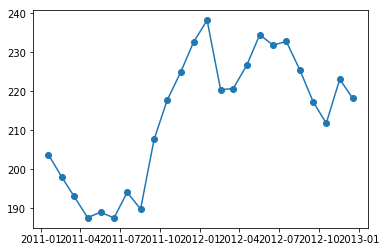

In [115]:
import matplotlib.pyplot as plt
plt.plot_date(list_dt, list_ex, "o-") # note plot_date !
plt.show()

Let's annotate the plot a little bit to make it easier to read. Like most graphical toolkits, `matplotlib` is very powerful but can be hard to explore. Have a look at the matplotlib notebook to figure out some of these tweaks!

NameError: name 'dates' is not defined

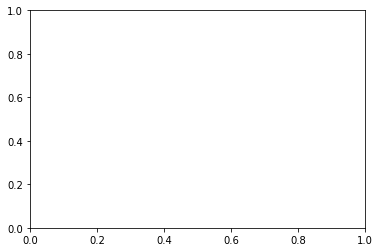

In [116]:
import numpy as np
fig, ax = plt.subplots()
plt.plot_date(dates, list_ex, ".-")

# add horizontal bar denoting 200 HUF = USD:
plt.axhline(200, linewidth=2, color='r')

# clean it up:
plt.xlabel("Year",        fontsize=20)
plt.ylabel("HUF vs. USD", fontsize=20)
plt.tick_params(labelsize=14)
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
min_locator=matplotlib.ticker.AutoMinorLocator(12)
ax.xaxis.set_minor_locator(min_locator)

We are building up the ability to do some **cool stuff**! :)

## Exercise

* Register for the API, and create your own app_id key
* Get the exchange rate HUF vs USD from 2000 to 2010, but every six months. Plot it on a plot.
* Get the exchange rate EUR vs USD from 2000 to 2010 monthly (careful with API rate limits! Test with, say, one year of data, and then request the rest). Plot it.
* Combine the two previous trends in one plot: put EUR vs USD in the main plot and HUF vs USD in an insert. Use different colors, and different symbols.
* Make nice plots: add a title, a legend. For example, use bigger round ('o') markers with bigger size (command MarkerSize), make the edge color (MarkerEdgecolor) light grey, the filling (MarkerFaceColor) red. Check a few examples in the matplotlib notebook
* Create a function that given a list and a window, return the [ moving average](https://en.wikipedia.org/wiki/Moving_average) with that window. Apply it to the EUR vs USD rate exchange and...
* ...plot it, but removing the top and right axes (command spine, look the matplotlib example)

Note: we will see commands to computer the moving average with one line. Here we want to see if you are able to write code to compute it by yourself. 


### XML
Markup language
<img src="xml.png">

In [117]:
import lxml
from lxml import etree

### Attributes and text
* Attributes are written in the tag e.g. title
* Text is between opening and closing tags

In [119]:
tree = etree.parse("test.xml")
root = tree.getroot()
print(tree.find("movie")) # finds the first element
print(tree.find("movie").find("type").text)
print(tree.find("movie").get("title"))

<Element movie at 0x2345968bd08>
War, Thriller
Enemy Behind


In [120]:
tree = etree.parse("test.xml")
for m in tree.iterfind("movie"):
    print(m.get("title"))


Enemy Behind
Transformers
Trigun
Ishtar


Some document formats are also xml, e.g. Word docx, or svg image

In [123]:
tree = etree.parse("ego250.svg")
root = tree.getroot()
print(tree.find(".//{http://www.w3.org/2000/svg}path").get("stroke"))

#000000


In [127]:
tree = etree.parse("ego250.svg")
root = tree.getroot()
for p in tree.iterfind(".//{http://www.w3.org/2000/svg}path"):
    p.set("stroke","#ff0000")
tree.write("test2.svg")

### Exercise 4
Change the color of the circles to blue #0000ff</br>
You should change fill and stroke too

In [131]:
tree = etree.parse("ego250.svg")
root = tree.getroot()
for p in tree.iterfind(".//{http://www.w3.org/2000/svg}path"):
    p.set("circle","#0000ff")
tree.write("test2.svg")

In [126]:
ex_xml = etree.Element("rates")
sub = etree.SubElement(ex_xml,"rate",date="1")
subsub = etree.SubElement(sub,"USD",value="1")
subsub = etree.SubElement(sub,"HUF",value="240")
print(etree.tostring(ex_xml))

b'<rates><rate date="1"><USD value="1"/><HUF value="240"/></rate></rates>'


### Exercise 5
Create an xml from the exchange rate data and write it to a file